In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk

Web scrapping 

In [15]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    response = requests.get(url)

    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}): 
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [16]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Once again a terrible busine...
1,✅ Trip Verified | BA A380's are showing their...
2,✅ Trip Verified | Credit to BA - Flew to Sin...
3,✅ Trip Verified | The check in area for prem...
4,✅ Trip Verified | The flight took off a littl...


In [17]:
df['reviews']=df['reviews'].str.split('|', expand=True)[1]

In [18]:
df

,reviews
0,Once again a terrible business class experien...
1,"BA A380's are showing their age, hopefully t..."
2,Credit to BA - Flew to Singapore recently a...
3,The check in area for premium classes at Ga...
4,The flight took off a little late due to Hea...
...,...
995,\r\nThe 2-3-2 seating in the front section of...
996,London to Johannesburg. Smooth check in via ...
997,BA836 on 19 Jan. Excellent short flight from...
998,Whatever happened to the World's Favourite A...


Data Cleaning 

In [19]:
import re

def clean(text):
# Removing all the special characters and numerical values
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()


,reviews,Cleaned Reviews
0,Once again a terrible business class experien...,Once again a terrible business class experien...
1,"BA A380's are showing their age, hopefully t...",BA A s are showing their age hopefully they w...
2,Credit to BA - Flew to Singapore recently a...,Credit to BA Flew to Singapore recently and a...
3,The check in area for premium classes at Ga...,The check in area for premium classes at Gatw...
4,The flight took off a little late due to Hea...,The flight took off a little late due to Heat...


NLP

In [21]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/abiramashree/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abiramashree/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/abiramashree/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))

    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))

    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/abiramashree/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/abiramashree/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,Once again a terrible business class experien...,Once again a terrible business class experien...,"[(terrible, a), (business, n), (class, n), (ex..."
1,"BA A380's are showing their age, hopefully t...",BA A s are showing their age hopefully they w...,"[(BA, None), (showing, v), (age, n), (hopefull..."
2,Credit to BA - Flew to Singapore recently a...,Credit to BA Flew to Singapore recently and a...,"[(Credit, n), (BA, n), (Flew, n), (Singapore, ..."
3,The check in area for premium classes at Ga...,The check in area for premium classes at Gatw...,"[(check, n), (area, n), (premium, a), (classes..."
4,The flight took off a little late due to Hea...,The flight took off a little late due to Heat...,"[(flight, n), (took, v), (little, a), (late, a..."


In [23]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Once again a terrible business class experien...,Once again a terrible business class experien...,"[(terrible, a), (business, n), (class, n), (ex...",terrible business class experience BA flight...
1,"BA A380's are showing their age, hopefully t...",BA A s are showing their age hopefully they w...,"[(BA, None), (showing, v), (age, n), (hopefull...",BA show age hopefully update interior soon l...
2,Credit to BA - Flew to Singapore recently a...,Credit to BA Flew to Singapore recently and a...,"[(Credit, n), (BA, n), (Flew, n), (Singapore, ...",Credit BA Flew Singapore recently also back ...
3,The check in area for premium classes at Ga...,The check in area for premium classes at Gatw...,"[(check, n), (area, n), (premium, a), (classes...",check area premium class Gatwick nice queue ...
4,The flight took off a little late due to Hea...,The flight took off a little late due to Heat...,"[(flight, n), (took, v), (little, a), (late, a...",flight take little late due Heathrow congest...


In [24]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Once again a terrible business class experien...,terrible business class experience BA flight...
1,"BA A380's are showing their age, hopefully t...",BA show age hopefully update interior soon l...
2,Credit to BA - Flew to Singapore recently a...,Credit BA Flew Singapore recently also back ...
3,The check in area for premium classes at Ga...,check area premium class Gatwick nice queue ...
4,The flight took off a little late due to Hea...,flight take little late due Heathrow congest...
...,...,...
995,\r\nThe 2-3-2 seating in the front section of...,seating front section Club World upper deck ...
996,London to Johannesburg. Smooth check in via ...,London Johannesburg Smooth check via Club Wo...
997,BA836 on 19 Jan. Excellent short flight from...,BA Jan Excellent short flight Heathrow Dubli...
998,Whatever happened to the World's Favourite A...,Whatever happen World Favourite Airline Retu...


In [26]:
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
    
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Once again a terrible business class experien...,Once again a terrible business class experien...,"[(terrible, a), (business, n), (class, n), (ex...",terrible business class experience BA flight...,-0.9287,Negative
1,"BA A380's are showing their age, hopefully t...",BA A s are showing their age hopefully they w...,"[(BA, None), (showing, v), (age, n), (hopefull...",BA show age hopefully update interior soon l...,0.9100,Positive
2,Credit to BA - Flew to Singapore recently a...,Credit to BA Flew to Singapore recently and a...,"[(Credit, n), (BA, n), (Flew, n), (Singapore, ...",Credit BA Flew Singapore recently also back ...,0.9702,Positive
3,The check in area for premium classes at Ga...,The check in area for premium classes at Gatw...,"[(check, n), (area, n), (premium, a), (classes...",check area premium class Gatwick nice queue ...,0.9940,Positive
4,The flight took off a little late due to Hea...,The flight took off a little late due to Heat...,"[(flight, n), (took, v), (little, a), (late, a...",flight take little late due Heathrow congest...,0.8934,Positive


In [27]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    481
Negative    410
Neutral     109
Name: count, dtype: int64

In [28]:
type(vader_counts)

pandas.core.series.Series

Data Visualization

([<matplotlib.patches.Wedge at 0x2b4af9dd0>,
 [Text(0.06562028214553672, 1.0980409730839467, 'Positive'),
  Text(-0.43051100546777216, -1.0122550440334335, 'Negative'),
  Text(1.271619409691705, -0.45330351520291584, 'Neutral')],
 [Text(0.03579288117029276, 0.5989314398639708, '48.1%'),
  Text(-0.23482418480060296, -0.5521391149273273, '41.0%'),
  Text(0.8006492579540364, -0.28541332438702105, '10.9%')])

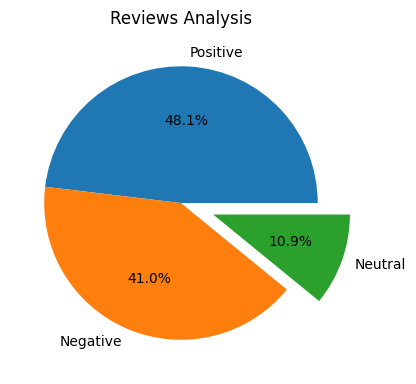

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)


In [31]:
df.to_csv("Preprocessed British Airways reviews.csv")

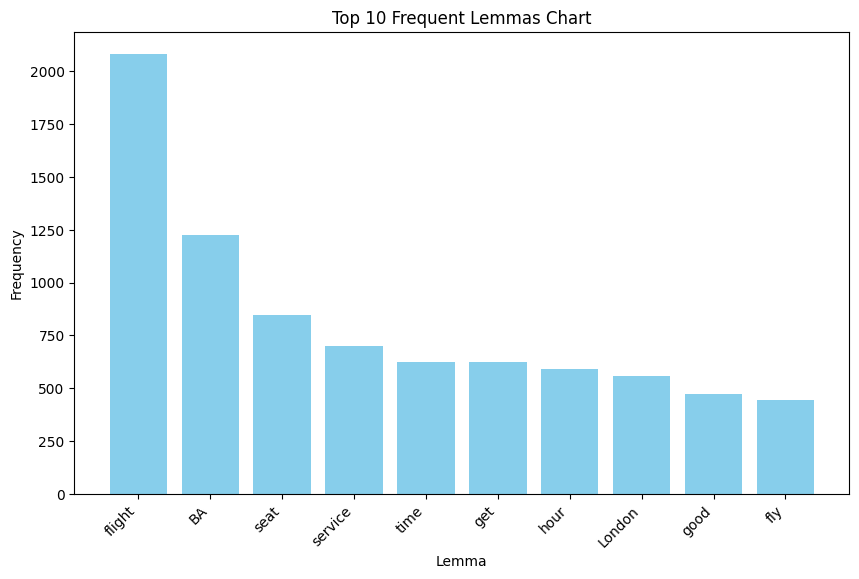

In [32]:

from collections import Counter
lemmas = ' '.join(df['Lemma']).split()

# Create a Counter to count the frequency of each lemma
lemma_counts = Counter(lemmas)

# Get the top N frequent lemmas, adjust N as needed
top_n = 10
top_lemmas = dict(lemma_counts.most_common(top_n))

# Plot the frequency chart using a bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_lemmas.keys(), top_lemmas.values(), color='skyblue')
plt.xlabel('Lemma')
plt.ylabel('Frequency')
plt.title('Top {} Frequent Lemmas Chart'.format(top_n))
plt.xticks(rotation=45, ha='right')
plt.show()